In [132]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#import things plan on using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#import dataset
etsy_data = pd.read_csv('drive/MyDrive/datascience/semester 5/decision support/coworker gift_analytics.csv')

In [135]:
print(etsy_data.shape) #47 columns and 1k rows

(1000, 47)


In [136]:
print(etsy_data.head())

                                        product_name  \
0  Hygge Gift Box with Blanket, Thank you gift, t...   
1  DIY Whiskey Making Kit | #1 DIY Gift Set for H...   
2  Personalized Desk Name Plate with Wooden Base,...   
3  Christmas Hygge Gift Box, Personalized Christm...   
4  Thank you Gift Box for Clients Employees Frien...   

                                        product_link     shop_name  \
0  https://www.etsy.com/listing/1510508511/hygge-...    kismetbyme   
1  https://www.etsy.com/listing/881573998/diy-whi...     doyourgin   
2  https://www.etsy.com/listing/1535974541/person...         EVMAT   
3  https://www.etsy.com/listing/1582642986/christ...    Joygiftbox   
4  https://www.etsy.com/listing/1610191185/thank-...  AleGiftsShop   

                                shop_link  price  est_mo_sales  \
0    https://www.etsy.com/shop/kismetbyme     44          1183   
1     https://www.etsy.com/shop/doyourgin     65           592   
2         https://www.etsy.com/shop/EVMAT   

In [137]:
print(etsy_data.info())
#most data type seem to fit for class will want to change listing age to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_name                  1000 non-null   object 
 1   product_link                  1000 non-null   object 
 2   shop_name                     1000 non-null   object 
 3   shop_link                     1000 non-null   object 
 4   price                         1000 non-null   int64  
 5   est_mo_sales                  1000 non-null   int64  
 6   est_mo_revenue                1000 non-null   int64  
 7   est_total_sales               1000 non-null   int64  
 8   reviews                       1000 non-null   int64  
 9   listing_age                   1000 non-null   object 
 10  favorites                     1000 non-null   int64  
 11  avg_reviews                   1000 non-null   int64  
 12  views                         1000 non-null   int64  
 13  cate

In [138]:
print(etsy_data.isna().sum()) # some missing values for category try to fill in based on product minimium processing fill in avg
#tags used and description for shipped from would just convert missing to unknown

product_name                       0
product_link                       0
shop_name                          0
shop_link                          0
price                              0
est_mo_sales                       0
est_mo_revenue                     0
est_total_sales                    0
reviews                            0
listing_age                        0
favorites                          0
avg_reviews                        0
views                              0
category                           8
tags_used                       1000
auto_renews                        0
is_customizable                    0
is_personalizable                  0
description_character_count     1000
has_variations                     0
is_supply                          0
minimum_processing                21
placement_of_listing_in_shop       0
shipped_from                      14
shop_age                           0
visibility_score                   0
conversion_rate                    0
s

In [139]:
etsy_data_na = pd.DataFrame(etsy_data.isna().sum()).reset_index()


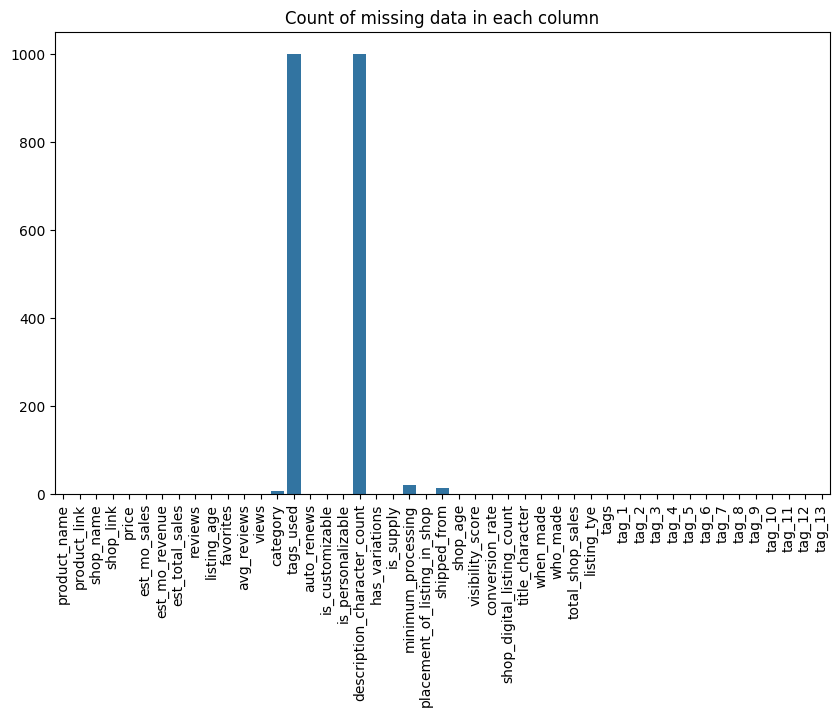

In [140]:
#plot missing data
plt.figure(figsize=(10, 6))
sns.barplot(data=etsy_data_na, x='index',y=0)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Count of missing data in each column')
plt.ylabel("")
plt.xlabel("")
plt.show()

In [141]:
#change na in category and to unknown and minimum processing to average
min_proc_mean = etsy_data['minimum_processing'].mean()
etsy_data['minimum_processing'] = etsy_data['minimum_processing'].fillna(min_proc_mean)

In [142]:
print(etsy_data.isna().sum())

product_name                       0
product_link                       0
shop_name                          0
shop_link                          0
price                              0
est_mo_sales                       0
est_mo_revenue                     0
est_total_sales                    0
reviews                            0
listing_age                        0
favorites                          0
avg_reviews                        0
views                              0
category                           8
tags_used                       1000
auto_renews                        0
is_customizable                    0
is_personalizable                  0
description_character_count     1000
has_variations                     0
is_supply                          0
minimum_processing                 0
placement_of_listing_in_shop       0
shipped_from                      14
shop_age                           0
visibility_score                   0
conversion_rate                    0
s

In [143]:
#Drop tags_used and description_character_count as empty column all are na
etsy_data = etsy_data.drop(['tags_used', 'description_character_count'], axis = 1)

In [151]:
#add column if is a gift box from product name using semistructured data as we can't do gift boxes now
# Create a column to identify rows containing the word 'box' or 'basket' in any word in the string
etsy_data['gift box'] = etsy_data['product_name'].str.contains('box|basket', case=False)
print((etsy_data['gift box']==True).sum()) # 153 are gift boxes remove those
# filter to keep rows where the value does not contain 'box or basket'
#do it later before running models as first want to see overall stats


153


In [152]:
print(etsy_data.head())

                                        product_name  \
0  Hygge Gift Box with Blanket, Thank you gift, t...   
1  DIY Whiskey Making Kit | #1 DIY Gift Set for H...   
2  Personalized Desk Name Plate with Wooden Base,...   
3  Christmas Hygge Gift Box, Personalized Christm...   
4  Thank you Gift Box for Clients Employees Frien...   

                                        product_link     shop_name  \
0  https://www.etsy.com/listing/1510508511/hygge-...    kismetbyme   
1  https://www.etsy.com/listing/881573998/diy-whi...     doyourgin   
2  https://www.etsy.com/listing/1535974541/person...         EVMAT   
3  https://www.etsy.com/listing/1582642986/christ...    Joygiftbox   
4  https://www.etsy.com/listing/1610191185/thank-...  AleGiftsShop   

                                shop_link  price  est_mo_sales  \
0    https://www.etsy.com/shop/kismetbyme     44          1183   
1     https://www.etsy.com/shop/doyourgin     65           592   
2         https://www.etsy.com/shop/EVMAT   

In [153]:
#Drop all 13 tag columns and first 4 columns name, link , shop name , and shop link since not necessary for analytics want to do
etsy_data = etsy_data.drop(['product_name', 'product_link', 'shop_name', 'shop_link', 'tags', 'tag_1', 'tag_2',
       'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9', 'tag_10',
       'tag_11', 'tag_12', 'tag_13','shop_digital_listing_count','placement_of_listing_in_shop'], axis = 1)

In [154]:
#remove the mo from listing age column
etsy_data['listing_age'] = etsy_data['listing_age'].str.extract('(\d+)', expand=False)

In [155]:
#convert listing age to integer
etsy_data['listing_age'] = etsy_data['listing_age'].astype(int)
#change column name to age_months
etsy_data.rename(columns = {'listing_age':'listing_age_months'}, inplace=True)

In [156]:
#validate that changed to integer
print(etsy_data['listing_age_months'].dtype)

int64


In [157]:
print('category',etsy_data['category'].unique())
print('shipped_from',etsy_data['shipped_from'].unique())
print('when_made',etsy_data['when_made'].unique())
print('who_made',etsy_data['who_made'].unique())
print('listing_tye',etsy_data['listing_tye'].unique())

category ['Paper & Party Supplies' 'Home & Living' 'Bath & Beauty' 'Jewelry'
 'Books, Movies & Music' 'Clothing' 'Bags & Purses'
 'Craft Supplies & Tools' 'Shoes' nan 'Accessories' 'Art & Collectibles'
 'Electronics & Accessories' 'Weddings' 'Toys & Games']
shipped_from ['US' 'MY' 'TR' 'CA' 'UA' 'GB' nan 'CN' 'IE' 'FR' 'VN' 'IN' 'AU' 'BG' 'HK'
 'MA' 'DE' 'LV' 'IL' 'ID' 'PL' 'BE' 'LT' 'KZ' 'ZA' 'BY' 'IT']
when_made ['made_to_order' '2020_2024' '2010_2019' '2020_2023']
who_made ['i_did' 'collective' 'someone_else']
listing_tye ['physical' 'download']


In [158]:
print(etsy_data.describe()) #avg price is $32 avg monthly sales are 63 sales. average total sales are around
#1200 avg amount of reviews are 240 and 1476 favorites while avg views per product are 35k avg shop age is 60 months
# and avg conversion rate is around 4

            price  est_mo_sales  est_mo_revenue  est_total_sales      reviews  \
count  1000.00000   1000.000000     1000.000000        1000.0000  1000.000000   
mean     31.87400     63.419000     1504.655000        1226.0360   239.041000   
std      23.55689    106.636649     2784.942719        2124.7364   380.518346   
min       2.00000      3.000000      396.000000           9.0000     0.000000   
25%      16.00000     20.000000      535.500000         231.0000    48.000000   
50%      25.00000     35.000000      751.000000         589.0000   116.000000   
75%      42.00000     67.000000     1397.500000        1445.2500   293.000000   
max     220.00000   2003.000000    52052.000000       24324.0000  4682.000000   

       listing_age_months     favorites  avg_reviews          views  \
count          1000.00000   1000.000000  1000.000000    1000.000000   
mean             21.09400   1476.433000    12.768000   35532.265000   
std              19.35339   2707.377234    19.655241   57

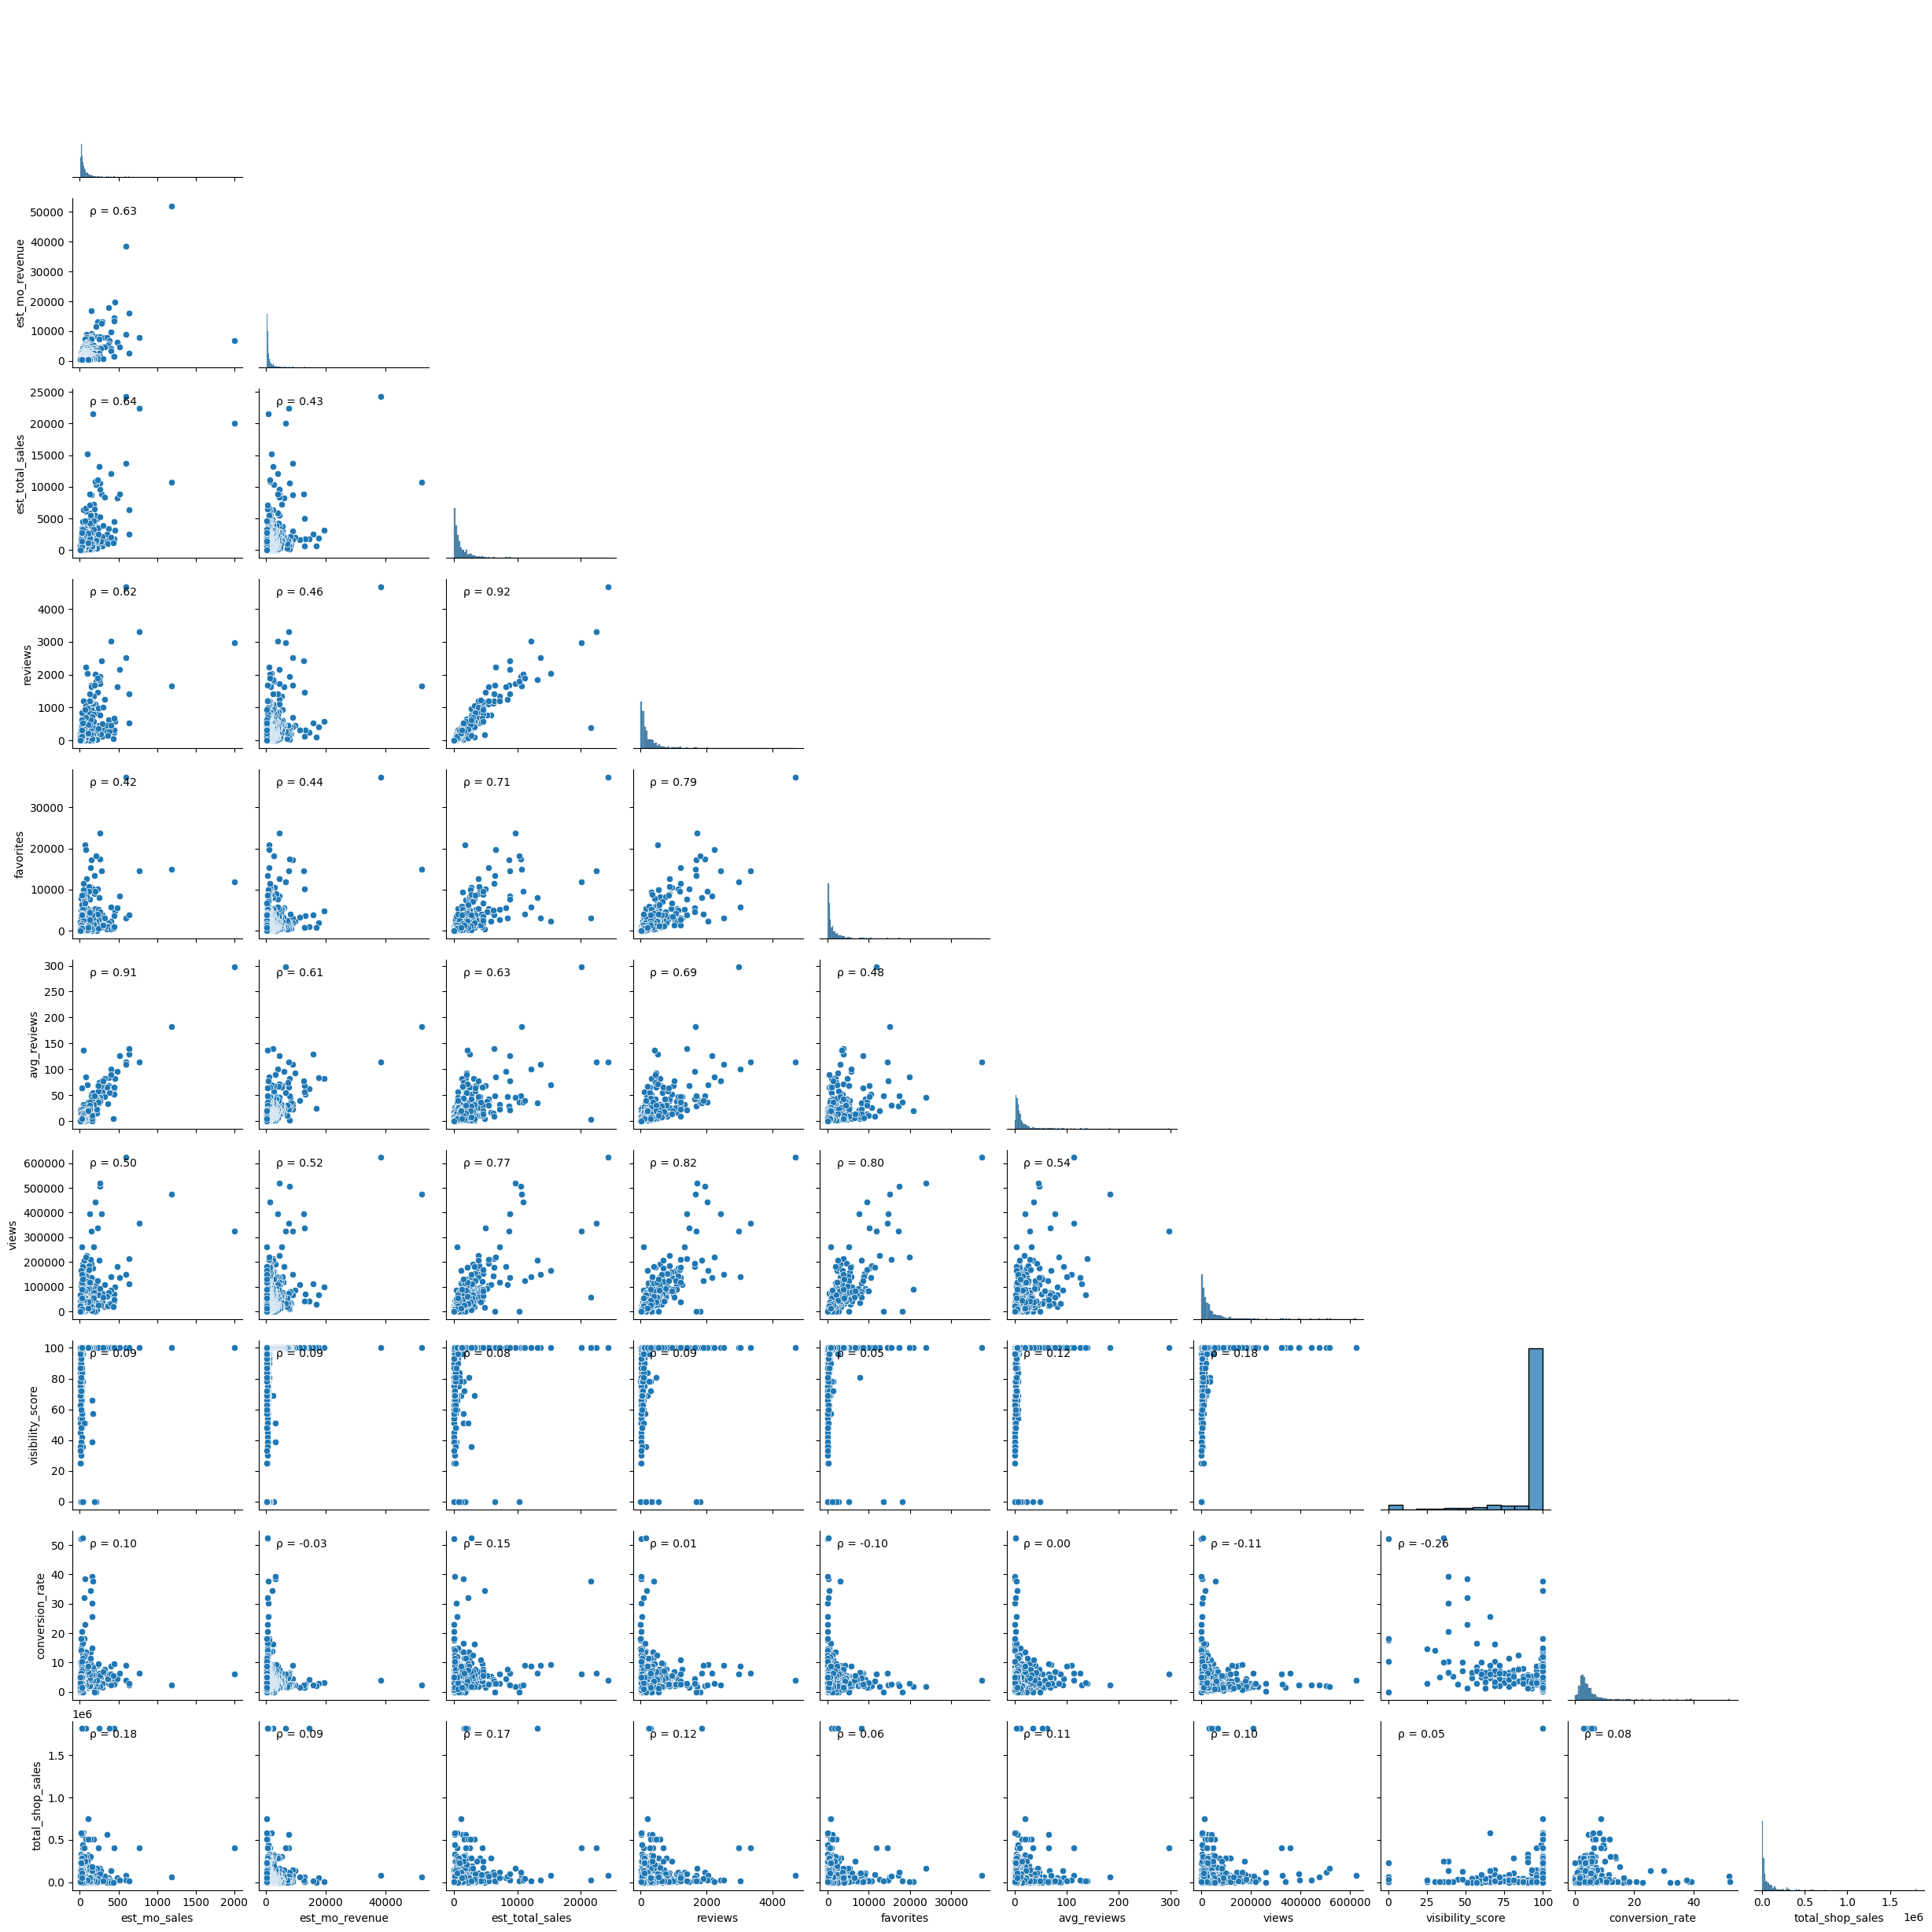

In [159]:
#do seperate dataframe with only all sucess metrics
etsy_success_metrics = etsy_data[['est_mo_sales', 'est_mo_revenue', 'est_total_sales', 'reviews',
        'favorites', 'avg_reviews', 'views',
       'visibility_score', 'conversion_rate', 'total_shop_sales']]

from scipy.stats import pearsonr
#function to plot correlation coefficient
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

#pairplot with sucess metrics
g = sns.pairplot(etsy_success_metrics,corner=True)
#show correlation score for each plot
g.map_lower(corrfunc)
plt.show()

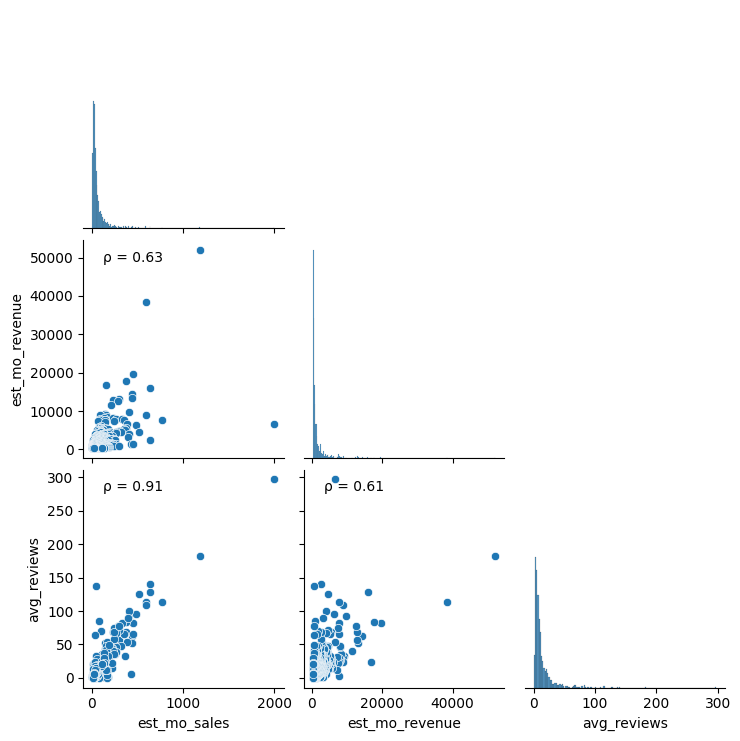

In [160]:
#do seperate dataframe for monthly and lifetime scores
etsy_success_metrics_monthly = etsy_data[['est_mo_sales', 'est_mo_revenue',
         'avg_reviews']]
etsy_success_metrics_lifetime = etsy_data[['est_total_sales', 'reviews',
        'favorites', 'views', 'total_shop_sales']]
#left out visibility score and conversion rate as those seem to have no correlation whatsoever on any other success marker


#pairplot with monthly sucess metrics
m = sns.pairplot(etsy_success_metrics_monthly,corner=True)
#show correlation score for each plot
m.map_lower(corrfunc)
plt.show()


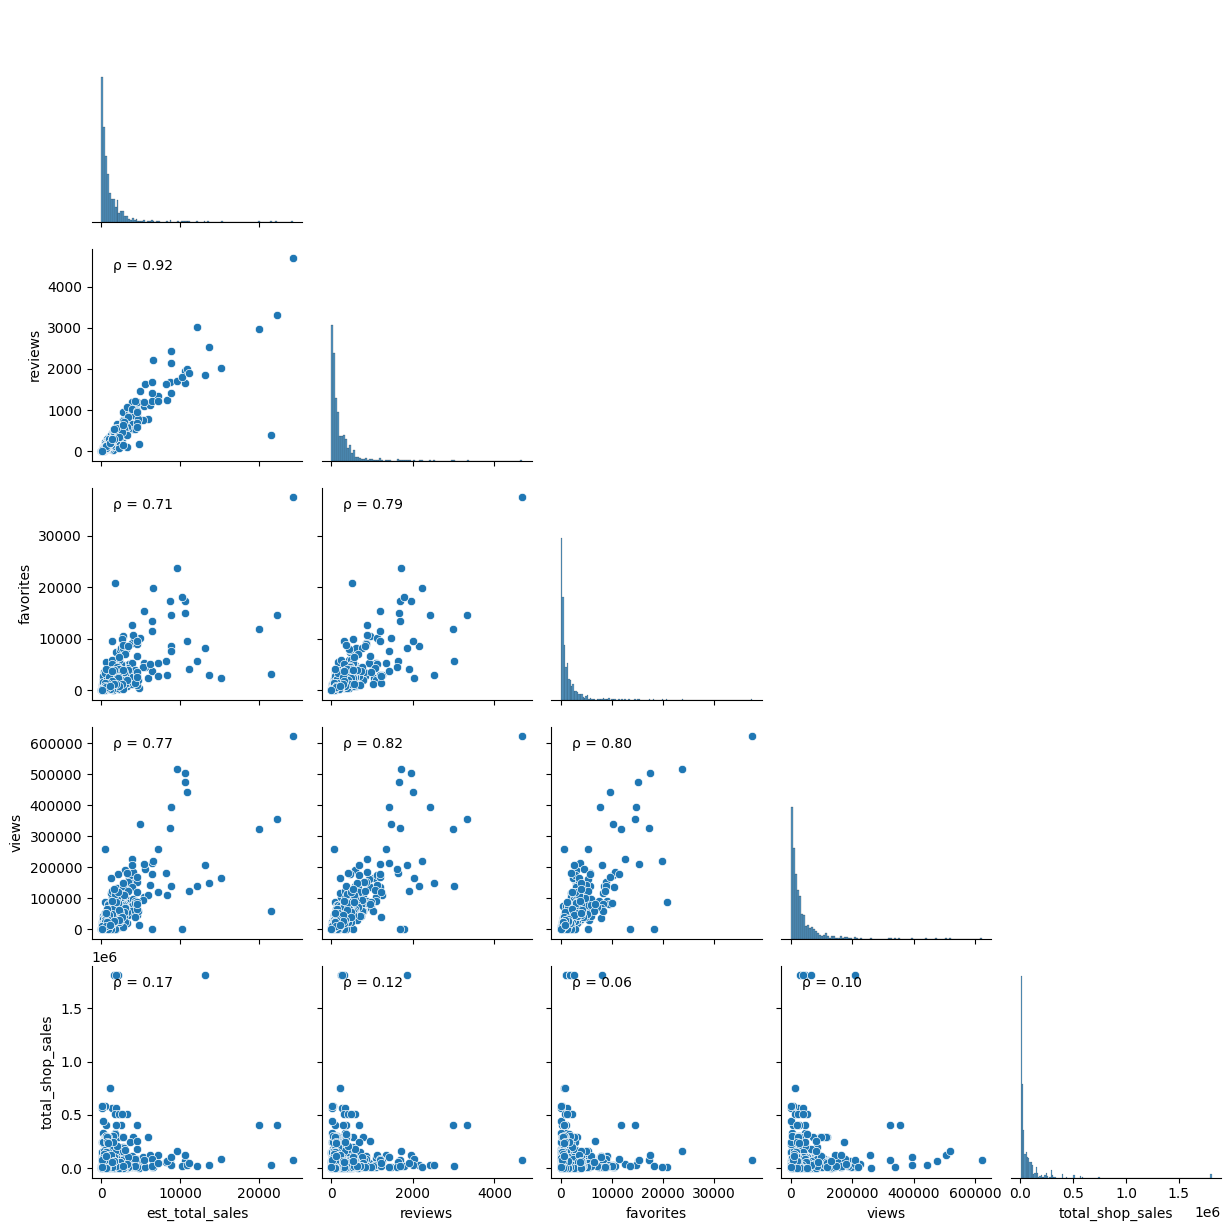

In [161]:
#pairplot with lifetime sucess metrics
l = sns.pairplot(etsy_success_metrics_lifetime,corner=True)
#show correlation score for each plot
l.map_lower(corrfunc)
plt.show()

In [162]:
#use metric to test sucess drop redundant features as favorite and revenue
print(etsy_data['avg_reviews'])
#I thought avg reviews is how many star review is turns out is how many reviews actually got


0      183
1      114
2       82
3       83
4       24
      ... 
995      3
996      5
997      0
998     20
999      5
Name: avg_reviews, Length: 1000, dtype: int64


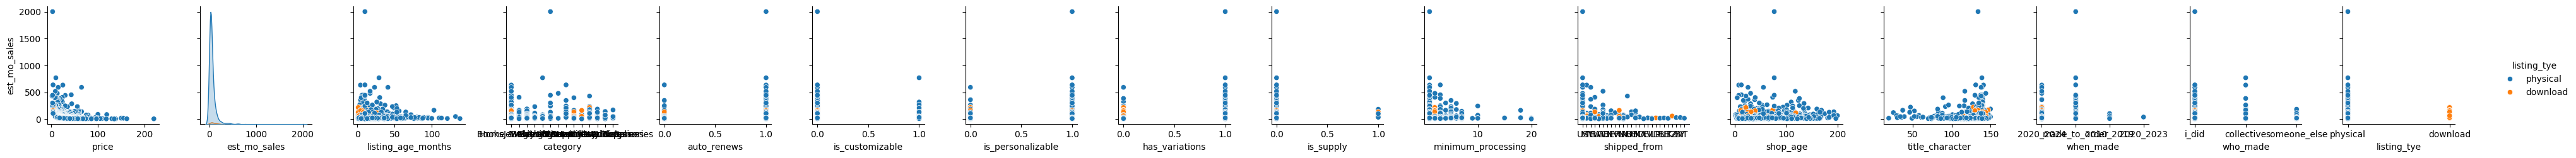

In [203]:
#filter to remove rows where is a gift box and not single item
etsy_data_testing = etsy_data[etsy_data['gift box'] != True]

#Do a testing dataset with all control variables relevant and est sales as target
etsy_data_testing = etsy_data_testing[['price', 'est_mo_sales',
       'listing_age_months', 'category',
       'auto_renews', 'is_customizable', 'is_personalizable', 'has_variations',
       'is_supply', 'minimum_processing', 'shipped_from', 'shop_age',
       'title_character', 'when_made',
       'who_made', 'listing_tye']]

#view a pairplot of these variables
sns.pairplot(etsy_data_testing, y_vars='est_mo_sales', x_vars=etsy_data_testing.columns.values, hue='listing_tye')
plt.show()


learned
best selling items are
lower priced, more recently listed, they autorenew, are not customizable, are personalizble, do have variations, are not a supply, processing time is shorter, can be anh age shop though usually not very old shop, title characters are more, more recently made and mostly collectivley made and is rather a physical product. will do seperate visualizations on some especially category and shipped from bec aren't very visible.

**Answering Questions with Visualizations**

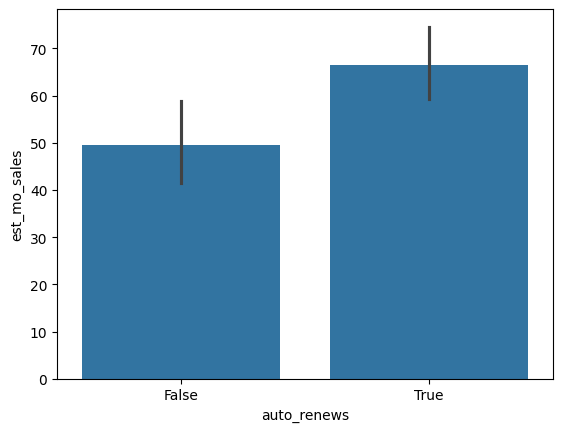

In [164]:
#Does auto renewing lead to more sales?
#bar plot with x as auto renewing and y sales
sns.barplot(data=etsy_data, x='auto_renews',y='est_mo_sales')
plt.show()
#seems like the ones with renewals have more sales on avg

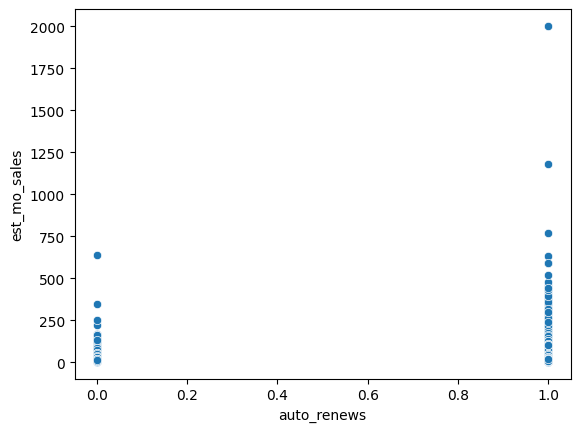

In [165]:
sns.scatterplot(data=etsy_data, x='auto_renews',y='est_mo_sales')
plt.show()

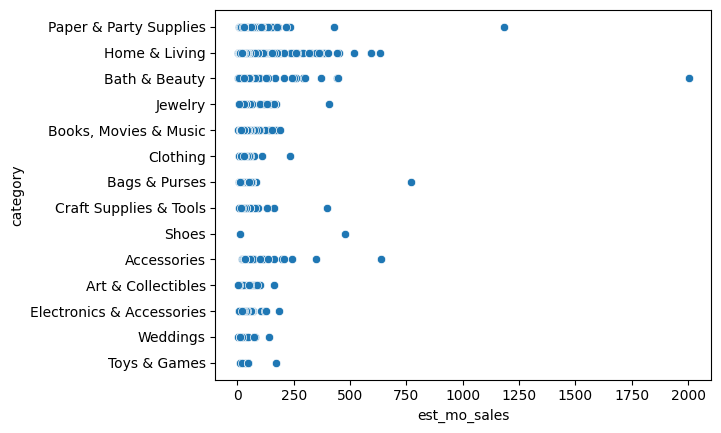

In [166]:
#Which category has the most avg sales and which has the highest average revenue
mean_sales_by_category = etsy_data.groupby('category')['est_mo_sales'].mean().sort_values(ascending=False)
#bar plot with x as categoris and y sales
sns.scatterplot(data=etsy_data, y='category',x='est_mo_sales')
#plt.xticks(rotation=45)
plt.show()


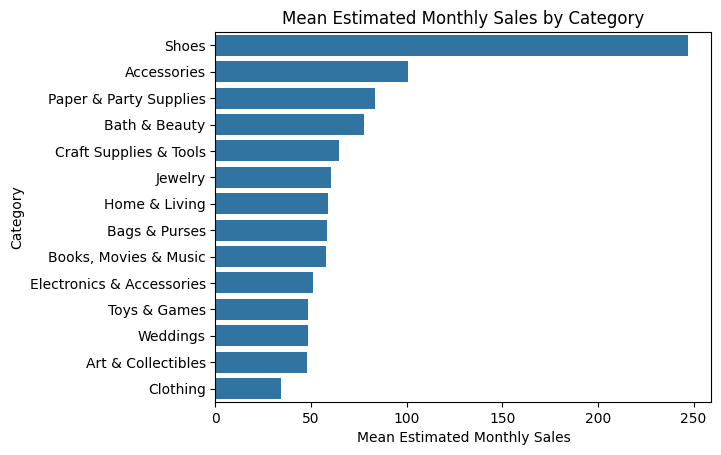

In [167]:
# Create bar plot
sns.barplot(x=mean_sales_by_category.values, y=mean_sales_by_category.index)
plt.xlabel('Mean Estimated Monthly Sales')
plt.ylabel('Category')
plt.title('Mean Estimated Monthly Sales by Category')
plt.show()

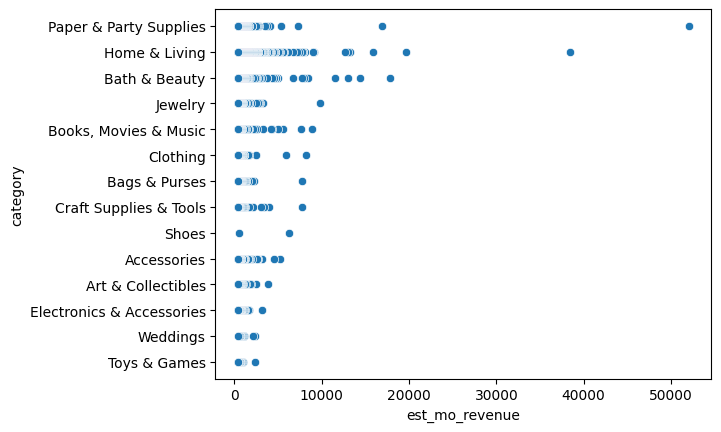

In [168]:
#bar plot with y as categories and y rev
sns.scatterplot(data=etsy_data, y='category',x='est_mo_revenue')
#plt.xticks(rotation=45)
plt.show()


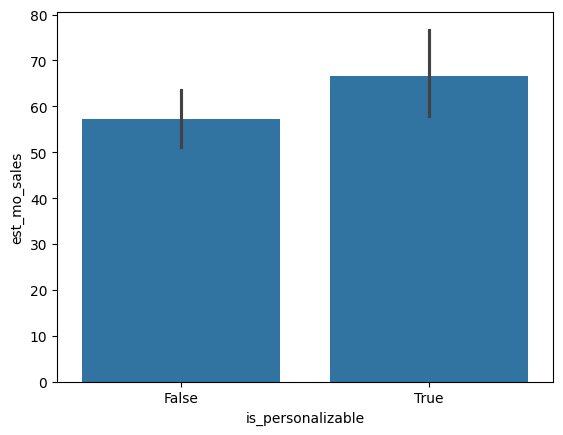

In [169]:
#3#Do personalizable listings lead to more sales?
#bar plot with x as personalizable and y sales
sns.barplot(data=etsy_data, y='est_mo_sales',x='is_personalizable')
plt.show()
#seems like it does lead to a bit more sales not by much and the confidence interval ia also bigger so don't
#think it pays to focus on personalizable listings so much as it does take a lot more time and harder to automate
#while not leading to a significant enough increase in sales on average.

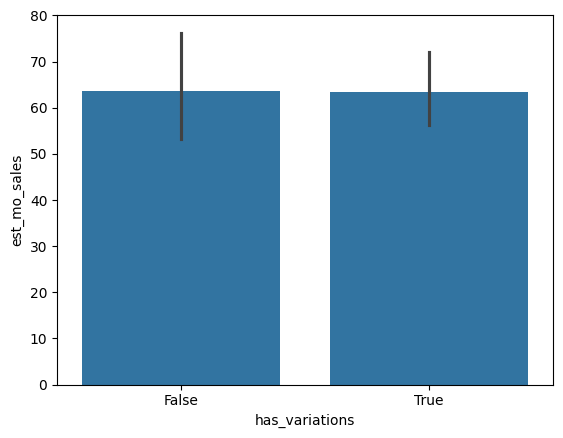

In [170]:
#4 Do listings with variations have more sales
sns.barplot(data=etsy_data,x= 'has_variations', y='est_mo_sales')
plt.show()
#there seems to be no difference on avg if a product has variations or not. Though products
#with no variations do have a bigger confidence interval.

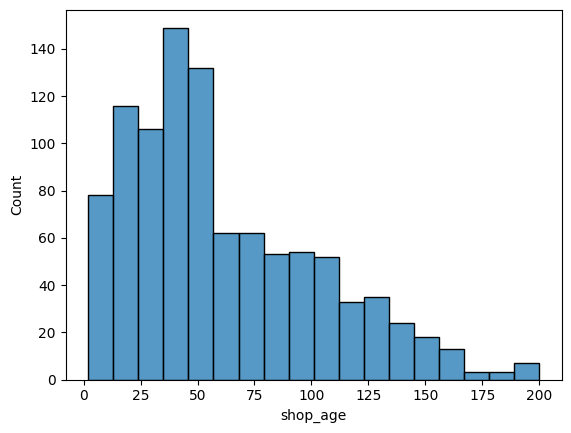

In [171]:
#5 how old are most shops and do older shops have more sales
sns.histplot(data=etsy_data,x= 'shop_age')
plt.show()
#there seems to be many more newer shops with majority between 40 and 50 months old that is around 4 years old
#seems like there was a huge spike of new shops at covid time it has dropped since then but
#still higher than precovid new shops per year.



<ipython-input-172-e2b502f68a6a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,16))


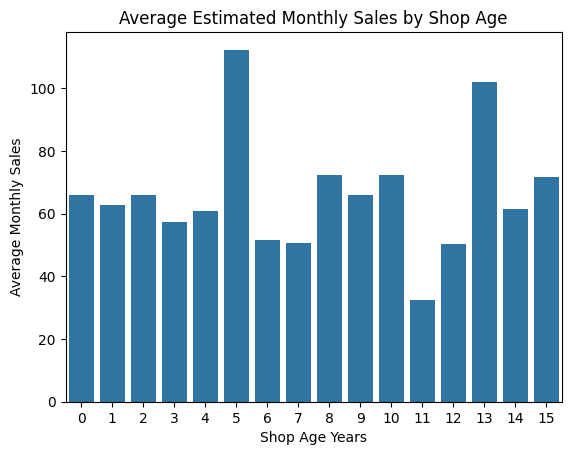

In [172]:
#will group
# Define the bins for shop_age
bins = [0,12,24,36,48,72,84,96,108,120,132,144,156,168,180,192,204]  # Define your desired bins here

# Create a new column in the DataFrame to indicate the bin for each shop_age
etsy_data['shop_age_bin'] = pd.cut(etsy_data['shop_age'], bins=bins, right=False)

# Aggregate est_mo_sales within each bin of shop_age
sales_by_age_bin = etsy_data.groupby('shop_age_bin')['est_mo_sales'].mean().reset_index()

# Create bar plot
ax = sns.barplot(data=sales_by_age_bin, x='shop_age_bin', y='est_mo_sales')
ax.set_xticklabels(range(0,16))
plt.xlabel('Shop Age Years')
plt.ylabel('Average Monthly Sales')
plt.title('Average Estimated Monthly Sales by Shop Age')
plt.show()
#the shops that opened right before covid seem to be doing best now with ones opened 13 years ago also.
#otherwise shops opened in the last few years seem to be doing about the same on avg and even better than
#some really old shops. so opening a new second shop now shouldn't be an issue.

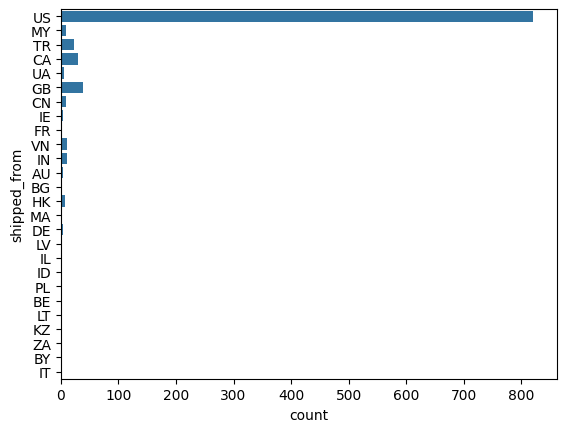

In [173]:
#6 which country are most shipped from
sns.countplot(data=etsy_data,y='shipped_from')
plt.show()
#most are shipped from US so won't pursue shipping providers outside of US for now

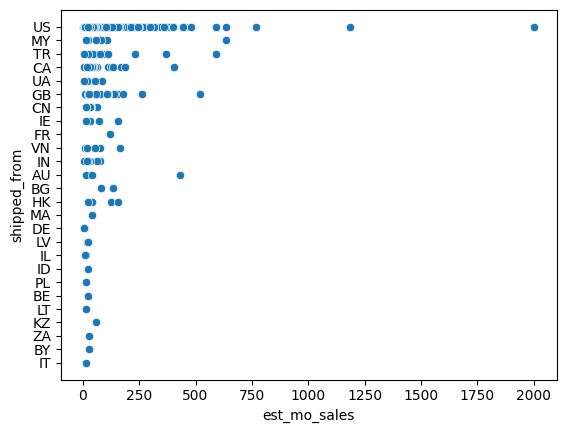

In [174]:
#7 Does any shipping country have higher average sales
sns.scatterplot(data=etsy_data,y='shipped_from',  x='est_mo_sales')
plt.show()
#most are shipped from US and ones with higher sasles are also US so won't pursue shipping providers outside of US for now
#although gb- great britian and canada seem like ranking next outside of one off ouliers if ever want to expand

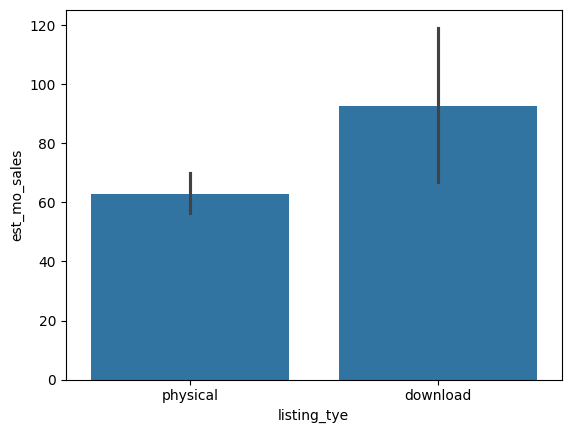

In [175]:
#8 Do digital listings have more sales
sns.barplot(data=etsy_data,x= 'listing_tye', y='est_mo_sales')
plt.show()

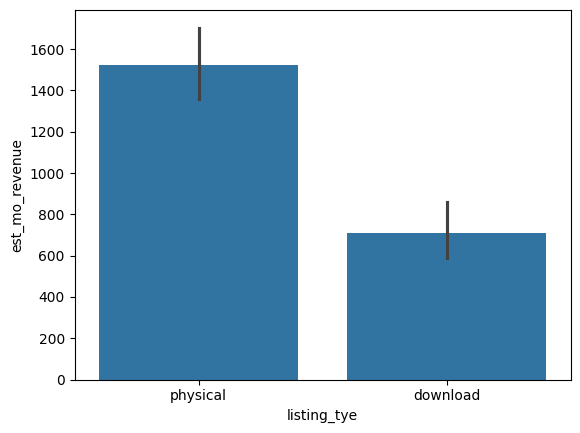

In [176]:
#totally unexpected but digital listing on avg have more sales will check revenue
#as well if also more since digital listings are usually cheaper. maybe pays to expand more to downloads
sns.barplot(data=etsy_data,x= 'listing_tye', y='est_mo_revenue')
plt.show()
#so although digital products make many more sales on avereage the avg revenue is much less than for physical products

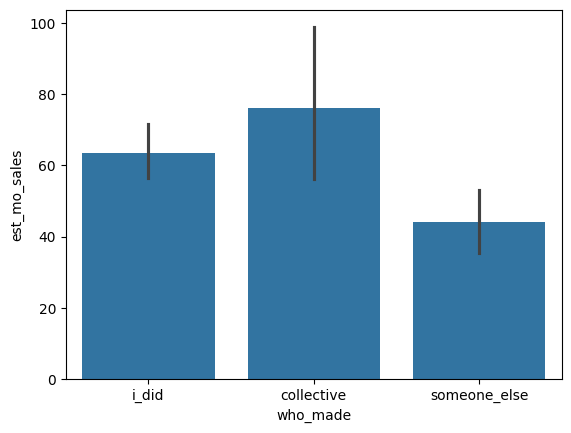

In [177]:
#9 Does who made it impact sales
sns.barplot(data=etsy_data,x= 'who_made', y='est_mo_sales')
plt.show()

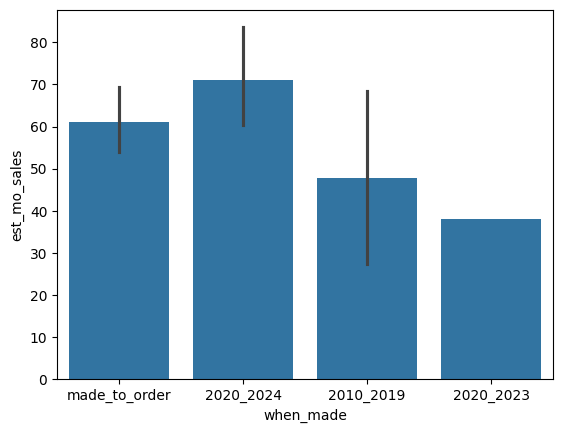

In [178]:
#10 Which category of when made has the most of
sns.barplot(data=etsy_data,x= 'when_made', y='est_mo_sales')
plt.show()

In [179]:
#see the range
title_len = etsy_data['title_character'].unique()
print(sorted(title_len))
#from 19-150
# Define the conditions and corresponding categories
conditions = [
    (etsy_data['title_character'] <= 45),
    (etsy_data['title_character'] > 45) & (etsy_data['title_character'] <= 71),
    (etsy_data['title_character'] > 71) & (etsy_data['title_character'] <= 97),
    (etsy_data['title_character'] > 97) & (etsy_data['title_character'] <= 123),
    (etsy_data['title_character'] > 123) & (etsy_data['title_character'] <= 150)
]
categories = ['very_short', 'short', 'medium', 'long', 'very_long']

# Create the new column based on conditions
etsy_data['title_character_cat'] = np.select(conditions, categories, default='extra_long')

# Display the DataFrame head to verify the new column
print(etsy_data.head())

[19, 25, 29, 30, 34, 35, 37, 39, 46, 47, 49, 52, 55, 56, 57, 58, 61, 63, 64, 70, 72, 74, 75, 77, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 150]
   price  est_mo_sales  est_mo_revenue  est_total_sales  reviews  \
0     44          1183           52052            10697     1654   
1     65           592           38421            24324     4682   
2     43           453           19615             3180      576   
3     52           371           17786             1856      415   
4    112           150           16848              607       97   

   listing_age_months  favorites  avg_reviews   views                category  \
0                   9      15016          183  475149  Paper & Party Supplies   
1               

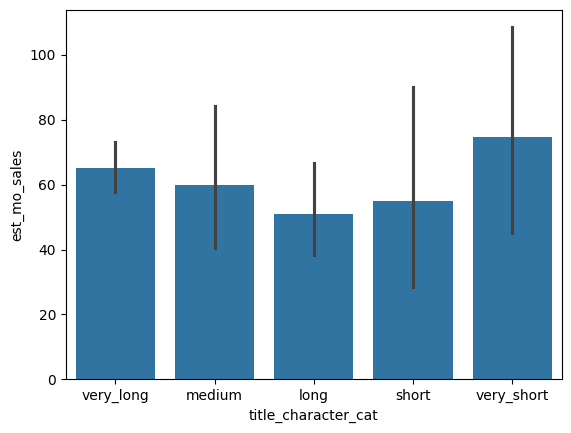

In [180]:
#11 Do more title characters (using every character in title allowed) lead to more sales
sns.barplot(data=etsy_data,x= 'title_character_cat', y='est_mo_sales')
plt.show()

In [181]:
print(etsy_data['minimum_processing'].unique())

[ 1.          3.          2.          5.          7.          4.
  6.         10.         20.          1.95812053 18.         15.
  9.        ]


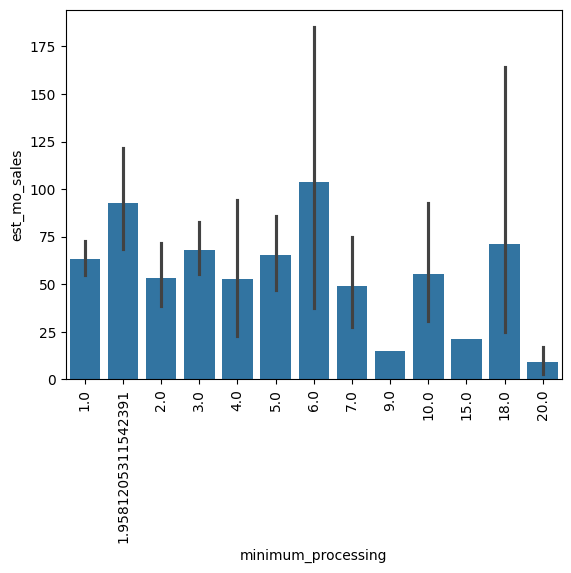

In [182]:
#11 Do lower processing time lead to more sales
sns.barplot(data=etsy_data,x= 'minimum_processing', y='est_mo_sales')
plt.xticks(rotation=90)
plt.show()

In [183]:
#back to dataset with target varible. Choosing total sales over revenue because at the end of the day profit is really the only
#thing that matters. and ones with more revenue are not necessarily more profit. If I can get the higher selling items can then work
#it out to be more profitable.



In [204]:
print(etsy_data_testing['is_supply'].unique())

[False  True]


In [205]:
#Filter to get only rows where category is not a supply since supplies is not something we do
etsy_data_testing = etsy_data_testing[etsy_data_testing['is_supply']==False]
#validate that craft supplies are not there anymore
print(etsy_data_testing['is_supply'].unique())
print(etsy_data_testing.shape)
#can drop that column now since all are now not supply
etsy_data_testing = etsy_data_testing.drop('is_supply',axis = 1)
#validate that one column less now
print(etsy_data_testing.shape)

[False]
(838, 16)
(838, 15)


In [206]:
#get dummy variables for categorical columns- category, who made and listing tye
from sklearn.preprocessing import OneHotEncoder
dummies = OneHotEncoder()
dummy_array = dummies.fit_transform(etsy_data_testing[['category', 'who_made', 'listing_tye']]).toarray()

In [207]:
#add title for each column
prefixes = ['category', 'who_made', 'listing_tye']
dummy_labels = dummies.categories_
labels = np.array([f'{prefix}_{label}' for prefix, sublist in zip(prefixes, dummy_labels) for label in sublist])
labels = np.array(labels)
dummy = pd.DataFrame(dummy_array, columns = labels)
print(dummy.head())

   category_Accessories  category_Art & Collectibles  category_Bags & Purses  \
0                   0.0                          0.0                     0.0   
1                   0.0                          0.0                     0.0   
2                   0.0                          0.0                     0.0   
3                   0.0                          0.0                     0.0   
4                   0.0                          0.0                     0.0   

   category_Bath & Beauty  category_Books, Movies & Music  category_Clothing  \
0                     0.0                             0.0                0.0   
1                     0.0                             0.0                0.0   
2                     0.0                             0.0                0.0   
3                     0.0                             0.0                0.0   
4                     0.0                             0.0                0.0   

   category_Craft Supplies & Tools  ca

In [208]:
print(etsy_data_testing.columns)

Index(['price', 'est_mo_sales', 'listing_age_months', 'category',
       'auto_renews', 'is_customizable', 'is_personalizable', 'has_variations',
       'minimum_processing', 'shipped_from', 'shop_age', 'title_character',
       'when_made', 'who_made', 'listing_tye'],
      dtype='object')


In [209]:
#recombine dummy variables with continuous ones
etsy_data_testing = pd.concat([etsy_data_testing[['price', 'est_mo_sales',
       'listing_age_months','auto_renews', 'is_customizable', 'is_personalizable',
        'has_variations', 'minimum_processing', 'shop_age',
       'title_character']],dummy],axis=1)
print(etsy_data_testing.head())

   price  est_mo_sales  listing_age_months auto_renews is_customizable  \
1   65.0         592.0                41.0        True           False   
2   43.0         453.0                 7.0        True           False   
5   25.0         634.0                 4.0        True           False   
7   30.0         443.0                 6.0        True           False   
9   56.0         233.0                21.0        True           False   

  is_personalizable has_variations  minimum_processing  shop_age  \
1             False          False                 1.0      56.0   
2              True           True                 3.0      13.0   
5              True           True                 1.0       8.0   
7              True           True                 1.0       8.0   
9              True           True                 1.0      33.0   

   title_character  ...  category_Paper & Party Supplies  category_Shoes  \
1            139.0  ...                              0.0             0

In [210]:
print(etsy_data_testing.isna().sum())

price                                 142
est_mo_sales                          142
listing_age_months                    142
auto_renews                           142
is_customizable                       142
is_personalizable                     142
has_variations                        142
minimum_processing                    142
shop_age                              142
title_character                       142
category_Accessories                  142
category_Art & Collectibles           142
category_Bags & Purses                142
category_Bath & Beauty                142
category_Books, Movies & Music        142
category_Clothing                     142
category_Craft Supplies & Tools       142
category_Electronics & Accessories    142
category_Home & Living                142
category_Jewelry                      142
category_Paper & Party Supplies       142
category_Shoes                        142
category_Toys & Games                 142
category_Weddings                 

In [212]:
#all have 142 nas not sure where picked it up will just drop it
etsy_data_testing = etsy_data_testing.dropna()
print(etsy_data_testing.isna().sum())
print(etsy_data_testing.shape)

price                                 0
est_mo_sales                          0
listing_age_months                    0
auto_renews                           0
is_customizable                       0
is_personalizable                     0
has_variations                        0
minimum_processing                    0
shop_age                              0
title_character                       0
category_Accessories                  0
category_Art & Collectibles           0
category_Bags & Purses                0
category_Bath & Beauty                0
category_Books, Movies & Music        0
category_Clothing                     0
category_Craft Supplies & Tools       0
category_Electronics & Accessories    0
category_Home & Living                0
category_Jewelry                      0
category_Paper & Party Supplies       0
category_Shoes                        0
category_Toys & Games                 0
category_Weddings                     0
category_nan                          0


In [213]:
#convert the objects/ booleans to numeric
etsy_data_testing[['auto_renews',
       'is_customizable', 'is_personalizable', 'has_variations']] = etsy_data_testing[['auto_renews',
       'is_customizable', 'is_personalizable', 'has_variations']].astype(int)

In [217]:
print(etsy_data_testing.dtypes)
print(etsy_data_testing.columns)

price                                 float64
est_mo_sales                          float64
listing_age_months                    float64
auto_renews                             int64
is_customizable                         int64
is_personalizable                       int64
has_variations                          int64
minimum_processing                    float64
shop_age                              float64
title_character                       float64
category_Accessories                  float64
category_Art & Collectibles           float64
category_Bags & Purses                float64
category_Bath & Beauty                float64
category_Books, Movies & Music        float64
category_Clothing                     float64
category_Craft Supplies & Tools       float64
category_Electronics & Accessories    float64
category_Home & Living                float64
category_Jewelry                      float64
category_Paper & Party Supplies       float64
category_Shoes                    

In [218]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target variable (y)
X = etsy_data_testing.drop(columns=['est_mo_sales'])
y = etsy_data_testing['est_mo_sales']
# Split id's into training and testing sets for when split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


In [219]:
# try different models

#linear regression
from sklearn.linear_model import LinearRegression
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
# decision tree
from sklearn.tree import DecisionTreeRegressor
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
#list of models
models=[LinearRegression(),GradientBoostingRegressor(),DecisionTreeRegressor(), Ridge()]
#empty list to store avg precision
mse_scores = []
r_squared_scores = []

#run models
for model in models:

    #fit the model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Compute R-squared (R2) score
    r_squared = r2_score(y_test, y_pred)
    r_squared_scores.append(r_squared)

# Create a dataframe of the average precision of each model
df_scores = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R-squared' : r_squared_scores})

# Print the dataframe
print(df_scores)

                                               Model           MSE  R-squared
0                                 LinearRegression()   8362.608644   0.025642
1  ([DecisionTreeRegressor(criterion='friedman_ms...   8603.609573  -0.002437
2                            DecisionTreeRegressor()  11663.649425  -0.358974
3                                            Ridge()   8060.044366   0.060895


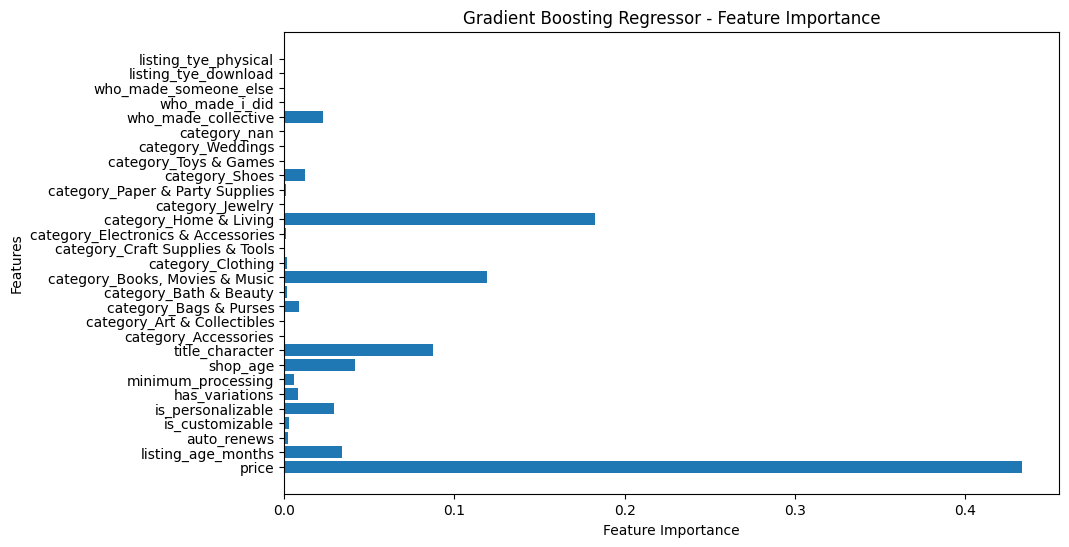

In [244]:
#gradient boosting regressor is working well though not ideal yet will try to optimize it
# Get feature importances
# Instantiate the model
gb_regressor = GradientBoostingRegressor()

# Fit the model to your data
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importance = gb_regressor.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()

In [282]:
# Get indices of significant features (assuming you want to keep features with non-zero importance)
significant_indices = feature_importance > 0

# Filter the training data to include only significant features
X_train_filtered = X_train.iloc[:, significant_indices]
X_test_filtered = X_test.iloc[:, significant_indices]
# Retrain the gradient boosting model with filtered features
gb_model_filtered = GradientBoostingRegressor()
gb_model_filtered.fit(X_train_filtered, y_train)

# Make predictions
y_pred_gb_model_filtered = gb_model_filtered.predict(X_test_filtered)
r_squared_gb_model_filtered = r2_score(y_test, y_pred_gb_model_filtered)
print(r_squared_gb_model_filtered)

0.03830668308003238


reducing features improved the gradient boosting model to .15 though the next time ran it was much less.

In [260]:
#will try to do a bagging regressor to see if get better results
from sklearn.ensemble import BaggingRegressor

# Instantiate a base gradient boosting regressor model
base_model = GradientBoostingRegressor()

# Instantiate a BaggingRegressor with the base model
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)
r_squared_bagging = r2_score(y_test, y_pred_bagging)
print(r_squared_bagging)

0.13750010916684297


bagging improved the r squared to .18.

Model is better but still not good enough rsquared is still under .2
will try to do linear model on own

In [283]:
#try fitting linear model to see which factors matter
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           est_mo_sales   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2.922
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.99e-06
Time:                        02:32:15   Log-Likelihood:                -3206.0
No. Observations:                 522   AIC:                             6466.
Df Residuals:                     495   BIC:                             6581.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [284]:
# Filter the dataset to include only statistically significant features
significant_features = model.pvalues[model.pvalues < 0.05].index
X_train_filtered = X_train[significant_features]

# Re-run the linear regression model with filtered features
model_filtered = sm.OLS(y_train, X_train_filtered).fit()
print(model_filtered.summary())

                                 OLS Regression Results                                
Dep. Variable:           est_mo_sales   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              40.96
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                    8.12e-41
Time:                        02:32:18   Log-Likelihood:                         -3224.3
No. Observations:                 522   AIC:                                      6461.
Df Residuals:                     516   BIC:                                      6486.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

managed to improve the model to .32 r squared after leaving only the few significant categories